<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ACP" data-toc-modified-id="ACP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Clustering-par-Classification-hiérarchique" data-toc-modified-id="Clustering-par-Classification-hiérarchique-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering par <em>Classification hiérarchique</em></a></span></li><li><span><a href="#Clustering-par-K-means" data-toc-modified-id="Clustering-par-K-means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering par <em>K-means</em></a></span><ul class="toc-item"><li><span><a href="#On-assigne-les-clusters-aux-pays" data-toc-modified-id="On-assigne-les-clusters-aux-pays-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>On assigne les clusters aux pays</a></span></li></ul></li><li><span><a href="#Pojection-des-clusters-sur-les-axes" data-toc-modified-id="Pojection-des-clusters-sur-les-axes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pojection des clusters sur les axes</a></span><ul class="toc-item"><li><span><a href="#Étude-des-centroïdes" data-toc-modified-id="Étude-des-centroïdes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Étude des centroïdes</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# On importe les données de disponibilités alimentaires
df_dispoAlim = pd.read_csv('/home/paul/Bureau/OPENCLASSROOM/PROJET/9/DisponibiliteAlimentaire_2017.csv')
df_dispoAlim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3]:
df_dispoAlim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
# On regarde les valeurs unique de chaque colonnes pour en supprimer certaines
for col in df_dispoAlim.columns:
    print(df_dispoAlim[col].unique())

['FBS']
['Nouveaux Bilans Alimentaire']
[  2 202   3   4  79   7   8 194   9   1  10  11  52  12  16  14  57 255
  23  53  17  19  80  20  21  26  27 233  35 115  32  33  40  96 128  41
 214  50  44  46  48 107  98  49  54  72  55  59  60 225  58 203  63 209
 231 238 185  66  67  68  74  75  73  81  84  86  89  90 175  91  93  95
  97  25 100 101 102 103 104  99 105 106 109 110 112 108 114 113  83 118
 122 119 121 123 126 256 154 129 131 130 132 133 134 143 137 136 138 141
 273 144  28 147 149 157 158 159 162 153 156 221 226 235 165 166 169 150
 170 171 173  70 174  37 117 146 120  56 116 215 183 229 184 189 188 191
 244 193 195 272 197 199 198 276  38 210 211 207 208  39 167 216 176 217
 220 222 213 223 230 234 155 236 237 249 251 181]
['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Angola'
 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie' 'Australie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermude

In [5]:
df_dispoAlim = df_dispoAlim.drop(columns={'Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Description du Symbole', 'Symbole'})
df_dispoAlim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Année    176600 non-null  int64  
 4   Unité    176600 non-null  object 
 5   Valeur   176600 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.1+ MB


In [6]:
#On supprime les doublons potentiels, on ne recherche pas les valeurs NAN, car il n'y en a pas ;-)
df_dispoAlim.drop_duplicates(inplace=True, ignore_index=True)
df_dispoAlim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Année    176600 non-null  int64  
 4   Unité    176600 non-null  object 
 5   Valeur   176600 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
#On ne garde que les informations pour les produits "Viande de Volailles"
df_dispoAlim.drop(df_dispoAlim.loc[df_dispoAlim['Produit'] != 'Viande de Volailles'].index, inplace=True)
del df_dispoAlim['Produit']
del df_dispoAlim['Année']
df_dispoAlim

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Milliers de tonnes,2.00
...,...,...,...,...
176396,Zimbabwe,Nourriture,Milliers de tonnes,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,kg,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,1.59


In [9]:
del df_dispoAlim['Unité']
df_dispoAlim

,Zone,Élément,Valeur
651,Afghanistan,Production,28.00
652,Afghanistan,Importations - Quantité,29.00
653,Afghanistan,Variation de stock,0.00
654,Afghanistan,Disponibilité intérieure,57.00
655,Afghanistan,Pertes,2.00
...,...,...,...
176396,Zimbabwe,Nourriture,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,1.59


In [10]:
# On fait des pays les individus de notre analyse
df_pivot = df_dispoAlim.pivot_table(index='Zone', columns='Élément', values = 'Valeur', aggfunc=np.mean)
df_pivot.head(10)

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
Angola,0.0,NaN,NaN,35.0,10.56,2.22,3.60,319.0,0.0,277.0,315.0,2.0,42.0,0.0,NaN,2.0,0.0
Antigua-et-Barbuda,2.0,NaN,0.0,233.0,54.10,17.55,17.77,7.0,0.0,7.0,5.0,NaN,0.0,0.0,NaN,NaN,0.0
Arabie saoudite,NaN,NaN,NaN,151.0,43.36,9.38,15.57,1435.0,10.0,722.0,1435.0,NaN,616.0,0.0,NaN,NaN,-108.0
Argentine,NaN,NaN,NaN,182.0,42.24,13.84,13.53,1962.0,207.0,8.0,1856.0,106.0,2161.0,0.0,NaN,NaN,0.0


In [11]:
df_pivot.reset_index(inplace=True)

In [12]:
# On regarde les valeurs uniques de chaque colonnes
for i in df_pivot.columns:
    
    print(i, df_pivot[i].unique())

Zone ['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Angola'
 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie' 'Australie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Belgique'
 'Belize' 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine'
 'Botswana' 'Brésil' 'Bulgarie' 'Burkina Faso' 'Bélarus' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chine, continentale' 'Chypre' 'Colombie'
 'Congo' 'Costa Rica' 'Croatie' 'Cuba' "Côte d'Ivoire" 'Danemark'
 'Djibouti' 'Dominique' 'El Salvador' 'Espagne' 'Estonie' 'Eswatini'
 'Fidji' 'Finlande' 'France' 'Fédération de Russie' 'Gabon' 'Gambie'
 'Ghana' 'Grenade' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Guyana'
 'Géorgie' 'Haïti' 'Honduras' 'Hongrie' 'Inde' 'Indonésie'
 "Iran (République islamique d')" 'Iraq' 'Irlande' 'Islande' 'Israël'
 'Italie' 'Jamaïque' 'Japon' 'Jordanie' 'Kazakhstan' 'Kenya'
 'Kirg

In [13]:
# On élimine les variables dont les valeurs se limitent à des "Nan" et des "0".
## On remplace le "nan" par "0" pour le reste des variables, pour pouvoir utiliser leurs valeurs,

del df_pivot['Semences']
del df_pivot['Aliments pour animaux']
df_pivot.fillna(0, inplace=True)
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Alimentation pour touristes                                    172 non-null    float64
 2   Autres utilisations (non alimentaire)                          172 non-null    float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 7   Disponibilité intérieure                                      

In [14]:
# On importe les données de "population"
df_population = pd.read_csv('/home/paul/Bureau/OPENCLASSROOM/PROJET/9/Population_2000_2018.csv')
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [15]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
for col in df_population.columns:
    print(df_population[col].unique())

['OA']
['Séries temporelles annuelles']
[  2 202   3   4  79   6   7 258   8 151 194   9   1  22  10  11  52  12
  13  16  14  57 255  23  53  17  18  19 278  80  20  21  26  27 233  29
  35 115  32  33  40  96 128  41 214  50  44  45  46  48 107  98  49 279
  54  72  55  59  60 225  58 178 203  63 209 231 238 185  66  67  68  74
  75  73  81  82  84  86  85  87  88  89  90  61 175  91  69  93  95  97
 264 259  36  47  65  64 163 127  25 224 240 239 243 100 101 102 103 104
  99 105 106 109 110 112 108 114 113  83 118 122 119 121 123 124 125 126
 256 154 129 131 130 132 133 134 143 135 137 136 270 138 145 140 141 273
 142 144  28 147 148 149 157 158 159 160 162 153 156 221 226 235 165 180
 299 166 168 169 150 170 171 173  70 177 174 179 212  37 117 146 250 120
  56 116 215 182 183 229 184 205 282 187 189 188 192 281 190  94 191 244
   5 193 195 272 186 196 197 200 280 199 198 201 276 206 277  38 210 211
 207 208  39 167 216 176 217 218 219 220 222 213 223 227 230 234 155 236
 237 249 25

In [17]:
df_population = df_population.drop(columns={'Symbole', 'Code Domaine','Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Domaine', 'Élément', 'Produit', 'Description du Symbole', 'Unité', 'Note'})
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    4411 non-null   object 
 1   Année   4411 non-null   int64  
 2   Valeur  4411 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.5+ KB


In [18]:
# On passe les valeurs de la population milliers en unité et
## on en profite pour créer la colonne "Population" en remplacement de "Valeur"
df_population['Valeur'] = df_population['Valeur'] * 1000
df_population.rename(columns={'Valeur' : 'Population'}, inplace=True)
df_population.head()

,Zone,Année,Population
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0


In [19]:
# On crée notre dataframe globale
df_pivot = df_population.merge(df_pivot)
print(df_pivot.info())
print('- - - - - - - - - - - - - - - - - -')
print(df_pivot.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3244 entries, 0 to 3243
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           3244 non-null   object 
 1   Année                                                          3244 non-null   int64  
 2   Population                                                     3244 non-null   float64
 3   Alimentation pour touristes                                    3244 non-null   float64
 4   Autres utilisations (non alimentaire)                          3244 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 3244 non-null   float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         3244 non-null   float64
 7   Disponibilité de matière grasse en quantité (g/personne/jour

In [20]:
df_pivot['Année'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [21]:
df_pivot.drop(df_pivot.loc[df_pivot['Année'] != 2017].index, inplace=True)
del df_pivot['Année']
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 17 to 3242
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Population                                                     172 non-null    float64
 2   Alimentation pour touristes                                    172 non-null    float64
 3   Autres utilisations (non alimentaire)                          172 non-null    float64
 4   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 5   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 6   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 7   Disponibilité de protéines en quantité (g/personne/jour)    

In [23]:
df_pivot['Zone'].replace(['Fédération de Russie'], 'Russie', inplace=True)
df_pivot['Zone'].replace(['Chine, continentale'], 'Chine', inplace=True)
df_pivot['Zone'].replace(['Chine - RAS de Hong-Kong'], 'HongKong', inplace=True)
df_pivot['Zone'].replace(['Bolivie (État plurinational de)'], 'Bolivie', inplace=True)
df_pivot['Zone'].replace(['Venezuela (République bolivarienne du)'], 'Vénézuela', inplace=True)
df_pivot['Zone'].replace(['République démocratique du Congo'], 'DemocraticRepublicofCongo', inplace=True)
df_pivot['Zone'].replace(['République-Unie de Tanzanie'], 'Tanzanie', inplace=True)
df_pivot['Zone'].replace(['Papouasie-Nouvelle-Guinée'], 'PapouasieNouvelleGuinée', inplace=True)
df_pivot['Zone'].replace(['République démocratique populaire lao'], 'Laos', inplace=True)
df_pivot['Zone'].replace(['Chine, Taiwan Province de'], 'Taiwan', inplace=True)
df_pivot['Zone'].replace(['Bhoutan'], 'Bhutan', inplace=True)
df_pivot['Zone'].replace(['Iran (République islamique d\')'], 'Iran', inplace=True)

# ACP

In [25]:
df_pivot.set_index('Zone', inplace=True)

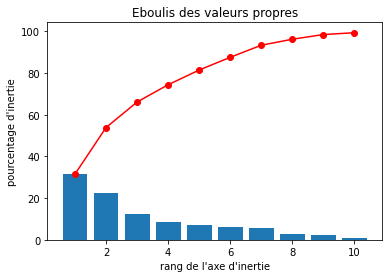

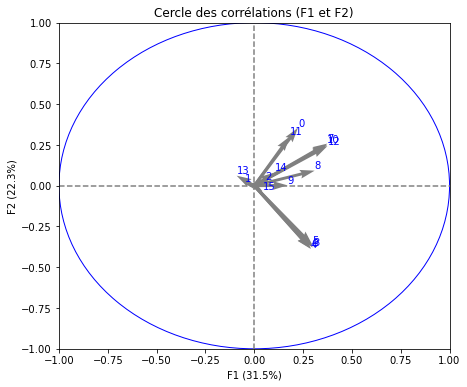

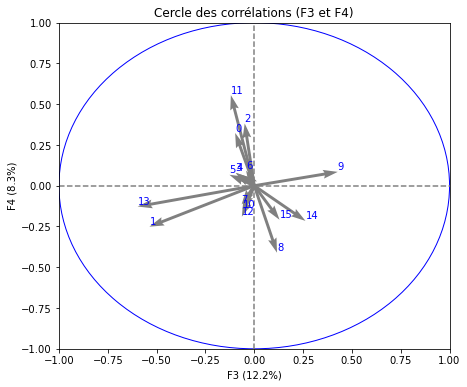

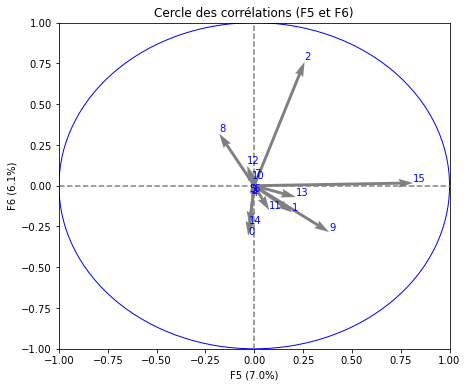

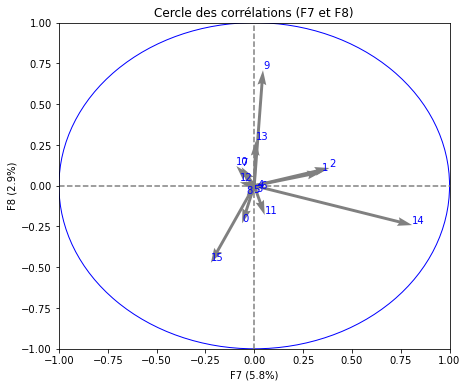

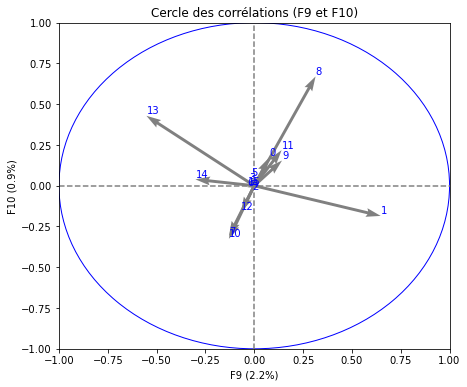

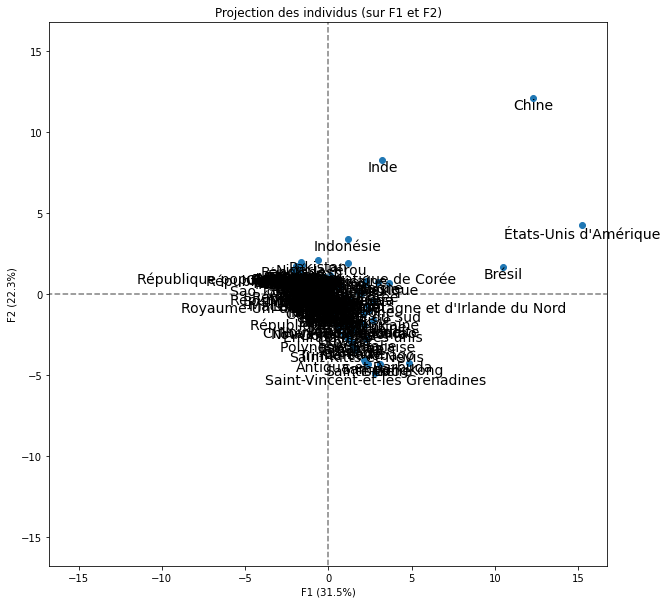

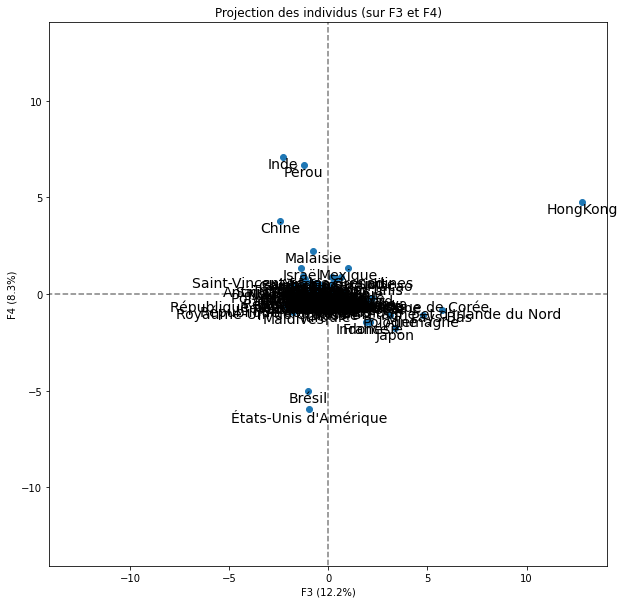

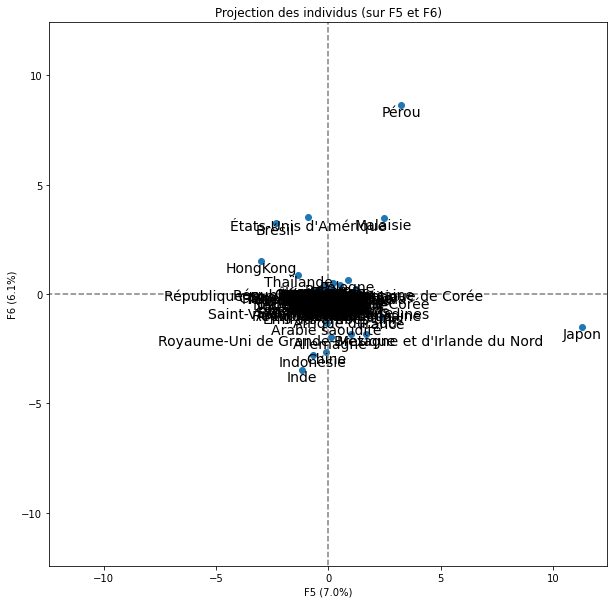

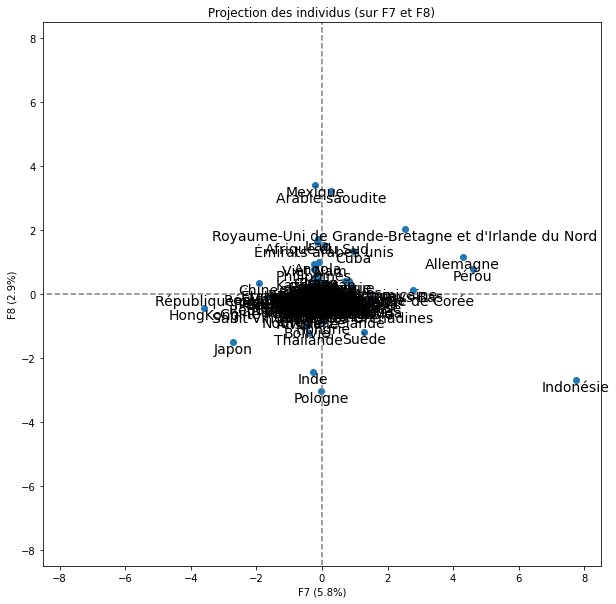

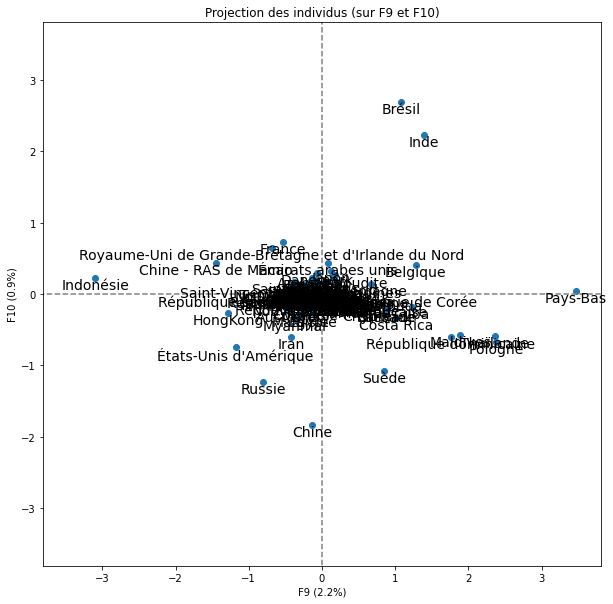

In [26]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 10

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_pivot
# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df_pivot.index # ou data.index pour avoir les intitulés
#features =  df_pivot.columns #df_pivot.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# création d'un dataframe permetant de remplacer les variables par des numéros
df_num = pd.DataFrame(data=X_scaled)
features =  df_num.columns #df_pivot.columns

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels = np.array(names))

plt.show()

In [27]:
# Création d'une table des correspondances pour relier les numéros à leurs variables
d = {'Numéro' : df_num.columns, 'Intitulé' : df_pivot.columns}
df_correspondance = pd.DataFrame(data=d)
df_correspondance

,Numéro,Intitulé
0,0,Population
1,1,Alimentation pour touristes
2,2,Autres utilisations (non alimentaire)
3,3,Disponibilité alimentaire (Kcal/personne/jour)
4,4,Disponibilité alimentaire en quantité (kg/pers...
5,5,Disponibilité de matière grasse en quantité (g...
6,6,Disponibilité de protéines en quantité (g/pers...
7,7,Disponibilité intérieure
8,8,Exportations - Quantité
9,9,Importations - Quantité


In [28]:
# Remplacement des variables initiales par les variables synthétiques
X_projected = pca.fit_transform(X_scaled)
df_synthétique = pd.DataFrame(X_projected, index=df_pivot.index, columns=['F'+str(i+1) for i in range(10)])
df_synthétique

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
Zone,,,,,,,,,,
Afghanistan,-1.894115,1.435737,0.157781,-0.269427,-0.157447,0.202911,-0.228709,0.109390,-0.030247,0.023118
Afrique du Sud,2.416154,-0.957929,0.204209,0.865675,0.727384,-1.024385,-0.142815,1.628647,0.051914,0.157207
Albanie,-0.540497,-0.447577,-0.231222,0.011584,-0.167665,0.005885,-0.173520,-0.019572,-0.144823,0.063285
Algérie,-1.442733,1.139082,-0.045115,-0.148678,-0.225200,0.171421,-0.238299,-0.043955,-0.085287,-0.030570
Allemagne,2.270924,0.784771,4.759921,-1.077820,0.097375,-1.947814,4.295744,1.163026,0.664297,0.139681
...,...,...,...,...,...,...,...,...,...,...
Vénézuela,-0.255524,0.028458,-0.326673,0.161074,-0.224205,-0.025683,-0.199065,-0.053321,-0.167131,-0.072762
Viet Nam,-0.141148,1.031535,0.332613,0.243073,0.369180,-0.448486,-0.244871,0.948331,0.046291,0.053048
Yémen,-1.271327,0.864685,0.107128,-0.122043,-0.076191,0.055967,-0.203424,0.255026,-0.049228,0.021602


In [29]:
#création du df des poids des variables init dans variable synthé (latente) ("pca.components_" donne les coordonnées des composantes principales dans l'espace initial)
df_poid_variable = pd.DataFrame(data= np.around(pca.components_*100), index=df_synthétique.columns, columns=df_pivot.columns)
df_poid_variable

,Population,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Traitement,Variation de stock
F1,22.0,-5.0,6.0,30.0,29.0,30.0,29.0,37.0,31.0,17.0,37.0,18.0,37.0,-9.0,10.0,4.0
F2,35.0,1.0,2.0,-38.0,-39.0,-36.0,-38.0,26.0,9.0,0.0,25.0,30.0,24.0,6.0,8.0,-4.0
F3,-10.0,-54.0,-5.0,-10.0,-9.0,-13.0,-4.0,-6.0,12.0,43.0,-6.0,-12.0,-6.0,-60.0,26.0,13.0
F4,32.0,-25.0,38.0,8.0,8.0,7.0,9.0,-11.0,-41.0,8.0,-15.0,56.0,-19.0,-13.0,-22.0,-21.0
F5,-3.0,19.0,26.0,-2.0,-1.0,-2.0,-1.0,0.0,-18.0,38.0,-1.0,8.0,-4.0,21.0,-3.0,81.0
F6,-31.0,-16.0,76.0,-5.0,-7.0,-5.0,-5.0,5.0,32.0,-28.0,4.0,-15.0,12.0,-7.0,-25.0,2.0
F7,-6.0,35.0,38.0,1.0,2.0,-1.0,3.0,-6.0,-4.0,4.0,-9.0,5.0,-7.0,1.0,81.0,-22.0
F8,-23.0,8.0,11.0,-5.0,-2.0,-6.0,-3.0,11.0,-6.0,71.0,12.0,-18.0,2.0,27.0,-24.0,-47.0
F9,8.0,65.0,-1.0,-2.0,-1.0,-1.0,-4.0,-13.0,31.0,14.0,-13.0,14.0,-7.0,-55.0,-30.0,-3.0
F10,17.0,-19.0,-4.0,2.0,-2.0,5.0,-1.0,-31.0,67.0,15.0,-33.0,22.0,-16.0,43.0,4.0,-0.0


In [30]:
df_poid_variable = np.transpose(df_poid_variable)
df_poid_variable

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
Population,22.0,35.0,-10.0,32.0,-3.0,-31.0,-6.0,-23.0,8.0,17.0
Alimentation pour touristes,-5.0,1.0,-54.0,-25.0,19.0,-16.0,35.0,8.0,65.0,-19.0
Autres utilisations (non alimentaire),6.0,2.0,-5.0,38.0,26.0,76.0,38.0,11.0,-1.0,-4.0
Disponibilité alimentaire (Kcal/personne/jour),30.0,-38.0,-10.0,8.0,-2.0,-5.0,1.0,-5.0,-2.0,2.0
Disponibilité alimentaire en quantité (kg/personne/an),29.0,-39.0,-9.0,8.0,-1.0,-7.0,2.0,-2.0,-1.0,-2.0
Disponibilité de matière grasse en quantité (g/personne/jour),30.0,-36.0,-13.0,7.0,-2.0,-5.0,-1.0,-6.0,-1.0,5.0
Disponibilité de protéines en quantité (g/personne/jour),29.0,-38.0,-4.0,9.0,-1.0,-5.0,3.0,-3.0,-4.0,-1.0
Disponibilité intérieure,37.0,26.0,-6.0,-11.0,0.0,5.0,-6.0,11.0,-13.0,-31.0
Exportations - Quantité,31.0,9.0,12.0,-41.0,-18.0,32.0,-4.0,-6.0,31.0,67.0
Importations - Quantité,17.0,0.0,43.0,8.0,38.0,-28.0,4.0,71.0,14.0,15.0


In [31]:
for F in df_poid_variable.columns:
    poids = df_poid_variable[F].sort_values(ascending=False)
    
    print(F, 'est composé ainsi:', poids)

F1 est composé ainsi: Disponibilité intérieure                                         37.0
Nourriture                                                       37.0
Production                                                       37.0
Exportations - Quantité                                          31.0
Disponibilité alimentaire (Kcal/personne/jour)                   30.0
Disponibilité de matière grasse en quantité (g/personne/jour)    30.0
Disponibilité alimentaire en quantité (kg/personne/an)           29.0
Disponibilité de protéines en quantité (g/personne/jour)         29.0
Population                                                       22.0
Pertes                                                           18.0
Importations - Quantité                                          17.0
Traitement                                                       10.0
Autres utilisations (non alimentaire)                             6.0
Variation de stock                                                4.

F1 (31.5 %) est corrélé _positivement_ à :
<br>Disponibilité intérieure                                         37.0
<br>Nourriture_Milliers de tonnes :                                  37.0
<br>Production_Milliers de tonnes :                                  37.0
<br>Exportations - Quantité :                                        31.0
<br>Disponibilité alimentaire (Kcal/personne/jour) :                 30.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour) :  30.0
<br>Disponibilité alimentaire en quantité (kg/personne/an) :         29.0
<br>Disponibilité de protéines en quantité (g/personne/jour) :       29.0
<br>Population                                                       22.0
<br>Pertes                                                           18.0
<br>Importations - Quantité                                          17.0
<br>Traitement                                                       10.0
<br>Autres utilisations (non alimentaire)                             6.0
<br>Variation de stock                                                4.0
<br><br>F1 (31.5 %) est corrélé _négativement_ à :
<br>Alimentation pour touristes                                      -5.0
<br>Résidus                                                          -9.0
<br><br> ___F1 = "Production Importante et Suffisante"___

F2 (22.3 % ) est corrélé _positivement_ à :
<br>Population : 35.0
<br>Pertes : 30.0
<br>Disponibilité intérieure : 26.0
<br>Nourriture :                     25.0
<br>Production :                                                      24.0
<br>Exportations - Quantité                                           9.0
<br>Traitement                                                        8.0
<br>Résidus                                                           6.0
<br>Autres utilisations (non alimentaire)                             2.0
<br>Alimentation pour touristes                                       1.0
<br>Importations - Quantité                                           0.0
<br><br> F2 est corrélé _négativement_ à :
<br>Variation de stock                                               -4.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour) : -36.0
<br>Disponibilité de protéines en quantité (g/personne/jour) :      -38.0
<br>Disponibilité alimentaire (Kcal/personne/jour) :                -38.0
<br>Disponibilité alimentaire en quantité (kg/personne/an) :        -39.0
<br><br> ___F2 = "Production Importante mais Insuffisante"___

F3 (12.2 %) est corrélé _positivement_ à :
<br>Importations - Quantité : 43.0
<br>Traitement : 26.0
<br>Exportations - Quantité                                          12.0
<br><br> F3 est corrélé _négativement_ à :
<br>Disponibilité de protéines en quantité (g/personne/jour)         -4.0
<br>Autres utilisations (non alimentaire)                            -5.0
<br>Disponibilité intérieure                                         -6.0
<br>Nourriture                                                       -6.0
<br>Production                                                       -6.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -9.0
<br>Population                                                      -10.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                  -10.0
<br>Pertes                                                          -12.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)   -13.0
<br>Alimentation pour touristes                                     -54.0
<br>Résidus                                                         -60.0
<br><br>___F3 = "Commerce International"___

F4 (8.3 %) est corrélé positivement à : 
<br>Pertes : 56.0
<br>Autres utilisations (non alimentaire) : 38.0
<br>Population : 32.0
<br>Disponibilité de protéines en quantité (g/personne/jour)          9.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                    8.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)            8.0
<br>Importations - Quantité                                           8.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)     7.0
<br><br> F4 est corrélé négativement à :
<br>Disponibilité intérieure                                        -11.0
<br>Résidus                                                         -13.0
<br>Nourriture                                                      -15.0
<br>Production                                                      -19.0
<br>Variation de stock                                              -21.0
<br>Traitement                                                      -22.0
<br>Alimentation pour touristes : -25.0
<br>Exportations - Quantité : -41.0
<br><br>___F4 = "Perte Importante Sans Risque Alimentaire"___

F5 (7 %) est corrélé _positivement_ à : 
<br>Variation de stock : 81.0
<br>Importations - Quantité : 38.0
<br>Autres utilisations (non alimentaire) : 26.0
<br>Résidus                                                          21.0
<br>Alimentation pour touristes                                      19.0
<br>Pertes                                                            8.0
<br>Disponibilité intérieure                                          0.0
<br><br>F4 est corrélé _négativement_ à : 
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -1.0
<br>Disponibilité de protéines en quantité (g/personne/jour)         -1.0
<br>Nourriture                                                       -1.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                   -2.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)    -2.0
<br>Population                                                       -3.0
<br>Traitement                                                       -3.0
<br>Production                                                       -4.0
<br>Exportations - Quantité                                         -18.0
<br><br>___F5 = "Réserve"___

F6 (6.1 %) est corrélé _positivement_ à : 
<br>Autres utilisations (non alimentaire) : 76.0
<br>Exportations - Quantité : 32.0
<br>Production                                                       12.0
<br>Disponibilité intérieure                                          5.0
<br>Nourriture                                                        4.0
<br>Variation de stock                                                2.0
<br><br> F6 est corrélé _négativement_ à :
<br>Disponibilité alimentaire (Kcal/personne/jour)                   -5.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)    -5.0
<br>Disponibilité de protéines en quantité (g/personne/jour)         -5.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -7.0
<br>Résidus                                                          -7.0
<br>Pertes                                                          -15.0
<br>Alimentation pour touristes                                     -16.0
<br>Traitement : -25.0
<br>Importations - Quantité : -28.0
<br>Population : -31.0
<br><br>___F6 = "Production Non Alimentaire et Exportatrice"___

F7 (5.8 %) est corrélé _positivement_ à : 
<br>Traitement                                                       81.0
<br>Autres utilisations (non alimentaire)                            38.0
<br>Alimentation pour touristes                                      35.0
<br>Pertes                                                            5.0
<br>Importations - Quantité                                           4.0
<br>Disponibilité de protéines en quantité (g/personne/jour)          3.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)            2.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                    1.0
<br>Résidus                                                           1.0
<br><br>F7 (5.8 %) est corrélé _négativement_ à :
<br>Disponibilité de matière grasse en quantité (g/personne/jour)    -1.0
<br>Exportations - Quantité                                          -4.0
<br>Population                                                       -6.0
<br>Disponibilité intérieure                                         -6.0
<br>Production                                                       -7.0
<br>Nourriture                                                       -9.0
<br>Variation de stock                                              -22.0
<br><br>___F7 = 'Industrie Domestique"___

F8 (2.9 %) est corrélé _positivement_ à : 
<br>Importations - Quantité                                          71.0
<br>Résidus                                                          27.0
<br>Nourriture                                                       12.0
<br>Autres utilisations (non alimentaire)                            11.0
<br>Disponibilité intérieure                                         11.0
<br>Alimentation pour touristes                                       8.0
<br>Production                                                        2.0
<br><br>F8 est corrélé _négativement_ à :
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -2.0
<br>Disponibilité de protéines en quantité (g/personne/jour)         -3.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                   -5.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)    -6.0
<br>Exportations - Quantité                                          -6.0
<br>Pertes                                                          -18.0
<br>Population                                                      -23.0
<br>Traitement                                                      -24.0
<br>Variation de stock                                              -47.0
<br><br>___F8 = "Production Insuffisante"___

F9 (2.2 %) est corrélé _positivement_ à :
<br>Alimentation pour touristes : 65.0
<br>Exportations - Quantité : 31.0
<br>Importations - Quantité                                          14.0
<br>Pertes                                                           14.0
<br>Population                                                        8.0
<br><br>F9 est corrélé _négativement_ à :
<br>Autres utilisations (non alimentaire)                            -1.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -1.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)    -1.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                   -2.0
<br>Variation de stock                                               -3.0
<br>Disponibilité de protéines en quantité (g/personne/jour)         -4.0
<br>Production                                                       -7.0
<br>Disponibilité intérieure                                        -13.0
<br>Nourriture                                                      -13.0
<br>Traitement : -30.0
<br>Résidus : -55.0
<br><br>___F9 = "Production à Visée Commerciale"___

F10 (0,9 %) est corrélé _positivement_ à :
<br>Exportations - Quantité : 67.0
<br>Résidus : 43.0
<br>Pertes : 22.0
<br>Population                                                       17.0
<br>Importations - Quantité                                          15.0
<br>Disponibilité de matière grasse en quantité (g/personne/jour)     5.0
<br>Traitement                                                        4.0
<br>Disponibilité alimentaire (Kcal/personne/jour)                    2.0
<br><br>F10 est corrélé _négativement_ à : 
<br>Variation de stock                                               -0.0
<br>Disponibilité de protéines en quantité (g/personne/jour)         -1.0
<br>Disponibilité alimentaire en quantité (kg/personne/an)           -2.0
<br>Autres utilisations (non alimentaire)                            -4.0
<br>Production                                                      -16.0
<br>Alimentation pour touristes                                     -19.0
<br>Disponibilité intérieure                                        -31.0
<br>Nourriture                                                      -33.0
<br><br>___F10 = "Préférence pour le Commerce et l'Industrie"___

In [32]:
df_synthétique.rename(columns={'F1':'Production Importante et Suffisante', 'F2':'Production Importante mais Insuffisante', 'F3':'Commerce International', 'F4':'Perte Importante Sans Risque Alimentaire', 'F5':'Réserve', 'F6':'Production Non Alimentaire et Exportatrice', 'F7':'Industrie Domestique', 'F8':'Production Insuffisante', 'F9':'Production à Visée Commerciale', 'F10':'Préférence pour le Commerce et l\'Industrie'}, inplace=True)

In [33]:
for F in df_synthétique.columns:
    print('Le pays contribuant le plus à la variable ', F, 'est ', df_synthétique.loc[df_synthétique[F] == df_synthétique[F].max()].index[0], '(', df_synthétique[F].max(), ')')

Le pays contribuant le plus à la variable  Production Importante et Suffisante est  États-Unis d'Amérique ( 15.232813742797022 )
Le pays contribuant le plus à la variable  Production Importante mais Insuffisante est  Chine ( 12.070564724186562 )
Le pays contribuant le plus à la variable  Commerce International est  HongKong ( 12.78926733291817 )
Le pays contribuant le plus à la variable  Perte Importante Sans Risque Alimentaire est  Inde ( 7.107201039914454 )
Le pays contribuant le plus à la variable  Réserve est  Japon ( 11.299250815122772 )
Le pays contribuant le plus à la variable  Production Non Alimentaire et Exportatrice est  Pérou ( 8.650387143621781 )
Le pays contribuant le plus à la variable  Industrie Domestique est  Indonésie ( 7.736692362941931 )
Le pays contribuant le plus à la variable  Production Insuffisante est  Mexique ( 3.424145206042712 )
Le pays contribuant le plus à la variable  Production à Visée Commerciale est  Pays-Bas ( 3.4651988649491194 )
Le pays contribuan

In [34]:
for F in df_synthétique.columns:
    if df_synthétique[F].min() < 0:
        print('Le pays contribuant négativement le plus à la variable ', F, 'est ', df_synthétique.loc[df_synthétique[F] == df_synthétique[F].min()].index[0], '(', df_synthétique[F].min(), ')')

Le pays contribuant négativement le plus à la variable  Production Importante et Suffisante est  Tchad ( -2.0473242088159282 )
Le pays contribuant négativement le plus à la variable  Production Importante mais Insuffisante est  Saint-Vincent-et-les Grenadines ( -4.8740900789506645 )
Le pays contribuant négativement le plus à la variable  Commerce International est  Chine ( -2.4331234804284345 )
Le pays contribuant négativement le plus à la variable  Perte Importante Sans Risque Alimentaire est  États-Unis d'Amérique ( -5.973985862112339 )
Le pays contribuant négativement le plus à la variable  Réserve est  HongKong ( -2.994603459384866 )
Le pays contribuant négativement le plus à la variable  Production Non Alimentaire et Exportatrice est  Inde ( -3.453001018736091 )
Le pays contribuant négativement le plus à la variable  Industrie Domestique est  HongKong ( -3.6008085076938916 )
Le pays contribuant négativement le plus à la variable  Production Insuffisante est  Pologne ( -3.052073892

In [35]:
for F in df_synthétique.columns:
    for val in range(0,len(df_synthétique)):
        if df_synthétique[F].values[val] > 0:
            print('Le ', df_synthétique[F].index[val], 'contribue positivement à ', F)

Le  Afrique du Sud contribue positivement à  Production Importante et Suffisante
Le  Allemagne contribue positivement à  Production Importante et Suffisante
Le  Antigua-et-Barbuda contribue positivement à  Production Importante et Suffisante
Le  Arabie saoudite contribue positivement à  Production Importante et Suffisante
Le  Argentine contribue positivement à  Production Importante et Suffisante
Le  Australie contribue positivement à  Production Importante et Suffisante
Le  Bahamas contribue positivement à  Production Importante et Suffisante
Le  Barbade contribue positivement à  Production Importante et Suffisante
Le  Bélarus contribue positivement à  Production Importante et Suffisante
Le  Bolivie contribue positivement à  Production Importante et Suffisante
Le  Brésil contribue positivement à  Production Importante et Suffisante
Le  Canada contribue positivement à  Production Importante et Suffisante
Le  Chili contribue positivement à  Production Importante et Suffisante
Le  HongKo

Le  Bélarus contribue positivement à  Réserve
Le  Bolivie contribue positivement à  Réserve
Le  Bulgarie contribue positivement à  Réserve
Le  Chili contribue positivement à  Réserve
Le  Taiwan contribue positivement à  Réserve
Le  Costa Rica contribue positivement à  Réserve
Le  Croatie contribue positivement à  Réserve
Le  Cuba contribue positivement à  Réserve
Le  Émirats arabes unis contribue positivement à  Réserve
Le  Espagne contribue positivement à  Réserve
Le  France contribue positivement à  Réserve
Le  Ghana contribue positivement à  Réserve
Le  Grèce contribue positivement à  Réserve
Le  Hongrie contribue positivement à  Réserve
Le  Iraq contribue positivement à  Réserve
Le  Italie contribue positivement à  Réserve
Le  Japon contribue positivement à  Réserve
Le  Kazakhstan contribue positivement à  Réserve
Le  Malaisie contribue positivement à  Réserve
Le  Malawi contribue positivement à  Réserve
Le  Maldives contribue positivement à  Réserve
Le  Mexique contribue positivem

Le  Guinée contribue positivement à  Production Insuffisante
Le  Guinée-Bissau contribue positivement à  Production Insuffisante
Le  Haïti contribue positivement à  Production Insuffisante
Le  Îles Salomon contribue positivement à  Production Insuffisante
Le  Iran contribue positivement à  Production Insuffisante
Le  Iraq contribue positivement à  Production Insuffisante
Le  Jordanie contribue positivement à  Production Insuffisante
Le  Kazakhstan contribue positivement à  Production Insuffisante
Le  Kirghizistan contribue positivement à  Production Insuffisante
Le  Koweït contribue positivement à  Production Insuffisante
Le  Lesotho contribue positivement à  Production Insuffisante
Le  Liban contribue positivement à  Production Insuffisante
Le  Libéria contribue positivement à  Production Insuffisante
Le  Macédoine du Nord contribue positivement à  Production Insuffisante
Le  Maldives contribue positivement à  Production Insuffisante
Le  Mali contribue positivement à  Production Insuf

In [36]:
for F in df_synthétique.columns:
    for val in range(0,len(df_synthétique)):
        if df_synthétique[F].values[val] < 0:
            print('Le ', df_synthétique[F].index[val], 'contribue négativement à ', F)

Le  Afghanistan contribue négativement à  Production Importante et Suffisante
Le  Albanie contribue négativement à  Production Importante et Suffisante
Le  Algérie contribue négativement à  Production Importante et Suffisante
Le  Angola contribue négativement à  Production Importante et Suffisante
Le  Arménie contribue négativement à  Production Importante et Suffisante
Le  Autriche contribue négativement à  Production Importante et Suffisante
Le  Azerbaïdjan contribue négativement à  Production Importante et Suffisante
Le  Bangladesh contribue négativement à  Production Importante et Suffisante
Le  Belgique contribue négativement à  Production Importante et Suffisante
Le  Belize contribue négativement à  Production Importante et Suffisante
Le  Bénin contribue négativement à  Production Importante et Suffisante
Le  Bosnie-Herzégovine contribue négativement à  Production Importante et Suffisante
Le  Botswana contribue négativement à  Production Importante et Suffisante
Le  Bulgarie cont

Le  Koweït contribue négativement à  Production Importante mais Insuffisante
Le  Lettonie contribue négativement à  Production Importante mais Insuffisante
Le  Lituanie contribue négativement à  Production Importante mais Insuffisante
Le  Luxembourg contribue négativement à  Production Importante mais Insuffisante
Le  Macédoine du Nord contribue négativement à  Production Importante mais Insuffisante
Le  Malaisie contribue négativement à  Production Importante mais Insuffisante
Le  Malte contribue négativement à  Production Importante mais Insuffisante
Le  Maroc contribue négativement à  Production Importante mais Insuffisante
Le  Maurice contribue négativement à  Production Importante mais Insuffisante
Le  Myanmar contribue négativement à  Production Importante mais Insuffisante
Le  Nicaragua contribue négativement à  Production Importante mais Insuffisante
Le  Norvège contribue négativement à  Production Importante mais Insuffisante
Le  Nouvelle-Calédonie contribue négativement à  Pr

Le  Haïti contribue négativement à  Réserve
Le  Honduras contribue négativement à  Réserve
Le  Îles Salomon contribue négativement à  Réserve
Le  Inde contribue négativement à  Réserve
Le  Indonésie contribue négativement à  Réserve
Le  Iran contribue négativement à  Réserve
Le  Irlande contribue négativement à  Réserve
Le  Islande contribue négativement à  Réserve
Le  Israël contribue négativement à  Réserve
Le  Jamaïque contribue négativement à  Réserve
Le  Jordanie contribue négativement à  Réserve
Le  Kenya contribue négativement à  Réserve
Le  Kirghizistan contribue négativement à  Réserve
Le  Kiribati contribue négativement à  Réserve
Le  Koweït contribue négativement à  Réserve
Le  Lesotho contribue négativement à  Réserve
Le  Lettonie contribue négativement à  Réserve
Le  Liban contribue négativement à  Réserve
Le  Libéria contribue négativement à  Réserve
Le  Lituanie contribue négativement à  Réserve
Le  Luxembourg contribue négativement à  Réserve
Le  Macédoine du Nord contr

Le  Iran contribue négativement à  Industrie Domestique
Le  Iraq contribue négativement à  Industrie Domestique
Le  Islande contribue négativement à  Industrie Domestique
Le  Japon contribue négativement à  Industrie Domestique
Le  Jordanie contribue négativement à  Industrie Domestique
Le  Kazakhstan contribue négativement à  Industrie Domestique
Le  Kenya contribue négativement à  Industrie Domestique
Le  Kirghizistan contribue négativement à  Industrie Domestique
Le  Kiribati contribue négativement à  Industrie Domestique
Le  Koweït contribue négativement à  Industrie Domestique
Le  Lesotho contribue négativement à  Industrie Domestique
Le  Lettonie contribue négativement à  Industrie Domestique
Le  Liban contribue négativement à  Industrie Domestique
Le  Libéria contribue négativement à  Industrie Domestique
Le  Lituanie contribue négativement à  Industrie Domestique
Le  Luxembourg contribue négativement à  Industrie Domestique
Le  Macédoine du Nord contribue négativement à  Indust

Le  République de Corée contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  République de Moldova contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  République dominicaine contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  République populaire démocratique de Corée contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Rwanda contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Saint-Kitts-et-Nevis contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Samoa contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Sao Tomé-et-Principe contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Sénégal contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Serbie contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Sierra Leone contribue négativement à  Préférence pour le Commerce et l'Industrie
Le  Sl

In [37]:
# Les variables initiales les mieux représenté sur les plan des composantes principales
var_Plan_1 = np.sqrt((df_poid_variable['F1']**2 + df_poid_variable['F2']**2))
var_Plan_1.sort_values(ascending=False)

Disponibilité alimentaire en quantité (kg/personne/an)           48.600412
Disponibilité alimentaire (Kcal/personne/jour)                   48.414874
Disponibilité de protéines en quantité (g/personne/jour)         47.801674
Disponibilité de matière grasse en quantité (g/personne/jour)    46.861498
Disponibilité intérieure                                         45.221676
Nourriture                                                       44.654227
Production                                                       44.102154
Population                                                       41.340053
Pertes                                                           34.985711
Exportations - Quantité                                          32.280025
Importations - Quantité                                          17.000000
Traitement                                                       12.806248
Résidus                                                          10.816654
Autres utilisations (non 

In [38]:
# Les variables initiales les mieux représenté sur les plan des composantes principales
var_Plan_2 = np.sqrt((df_poid_variable['F3']**2 + df_poid_variable['F4']**2))
var_Plan_2.sort_values(ascending=False)

Résidus                                                          61.392182
Alimentation pour touristes                                      59.506302
Pertes                                                           57.271284
Importations - Quantité                                          43.737855
Exportations - Quantité                                          42.720019
Autres utilisations (non alimentaire)                            38.327536
Traitement                                                       34.058773
Population                                                       33.526109
Variation de stock                                               24.698178
Production                                                       19.924859
Nourriture                                                       16.155494
Disponibilité de matière grasse en quantité (g/personne/jour)    14.764823
Disponibilité alimentaire (Kcal/personne/jour)                   12.806248
Disponibilité intérieure 

In [39]:
# Les variables initiales les mieux représenté sur les plan des composantes principales
var_Plan_3 = np.sqrt((df_poid_variable['F5']**2 + df_poid_variable['F6']**2))
var_Plan_3.sort_values(ascending=False)

Variation de stock                                               81.024688
Autres utilisations (non alimentaire)                            80.324343
Importations - Quantité                                          47.201695
Exportations - Quantité                                          36.715120
Population                                                       31.144823
Traitement                                                       25.179357
Alimentation pour touristes                                      24.839485
Résidus                                                          22.135944
Pertes                                                           17.000000
Production                                                       12.649111
Disponibilité alimentaire en quantité (kg/personne/an)            7.071068
Disponibilité alimentaire (Kcal/personne/jour)                    5.385165
Disponibilité de matière grasse en quantité (g/personne/jour)     5.385165
Disponibilité de protéine

In [40]:
# Les variables initiales les mieux représenté sur les plan des composantes principales
var_Plan_4 = np.sqrt((df_poid_variable['F7']**2 + df_poid_variable['F8']**2))
var_Plan_4.sort_values(ascending=False)

Traitement                                                       84.480767
Importations - Quantité                                          71.112587
Variation de stock                                               51.894123
Autres utilisations (non alimentaire)                            39.560081
Alimentation pour touristes                                      35.902646
Résidus                                                          27.018512
Population                                                       23.769729
Pertes                                                           18.681542
Nourriture                                                       15.000000
Disponibilité intérieure                                         12.529964
Production                                                        7.280110
Exportations - Quantité                                           7.211103
Disponibilité de matière grasse en quantité (g/personne/jour)     6.082763
Disponibilité alimentaire

In [41]:
# Les variables initiales les mieux représenté sur les plan des composantes principales
var_Plan_5 = np.sqrt((df_poid_variable['F9']**2 + df_poid_variable['F10']**2))
var_Plan_5.sort_values(ascending=False)

Exportations - Quantité                                          73.824115
Résidus                                                          69.814039
Alimentation pour touristes                                      67.720012
Nourriture                                                       35.468296
Disponibilité intérieure                                         33.615473
Traitement                                                       30.265492
Pertes                                                           26.076810
Importations - Quantité                                          20.518285
Population                                                       18.788294
Production                                                       17.464249
Disponibilité de matière grasse en quantité (g/personne/jour)     5.099020
Autres utilisations (non alimentaire)                             4.123106
Disponibilité de protéines en quantité (g/personne/jour)          4.123106
Variation de stock       

# Clustering par _Classification hiérarchique_

In [42]:
# On fait le dendrogramme
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [43]:
# préparation des données pour le clustering
X_synthé = df_synthétique.values
names_synthé = df_synthétique.index

In [44]:
# Centrage et Réduction
std_scale_synthé = preprocessing.StandardScaler().fit(X_synthé)
X_scaled_synthé = std_scale_synthé.transform(X_synthé)

In [45]:
# Clustering hiérarchique
Z_synthé = linkage(X_scaled_synthé, 'ward', metric='euclidean')
Z_centroide_synthé = linkage(X_scaled_synthé, 'centroid', metric='euclidean')

In [46]:
Z_synthé == Z_centroide_synthé

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
 

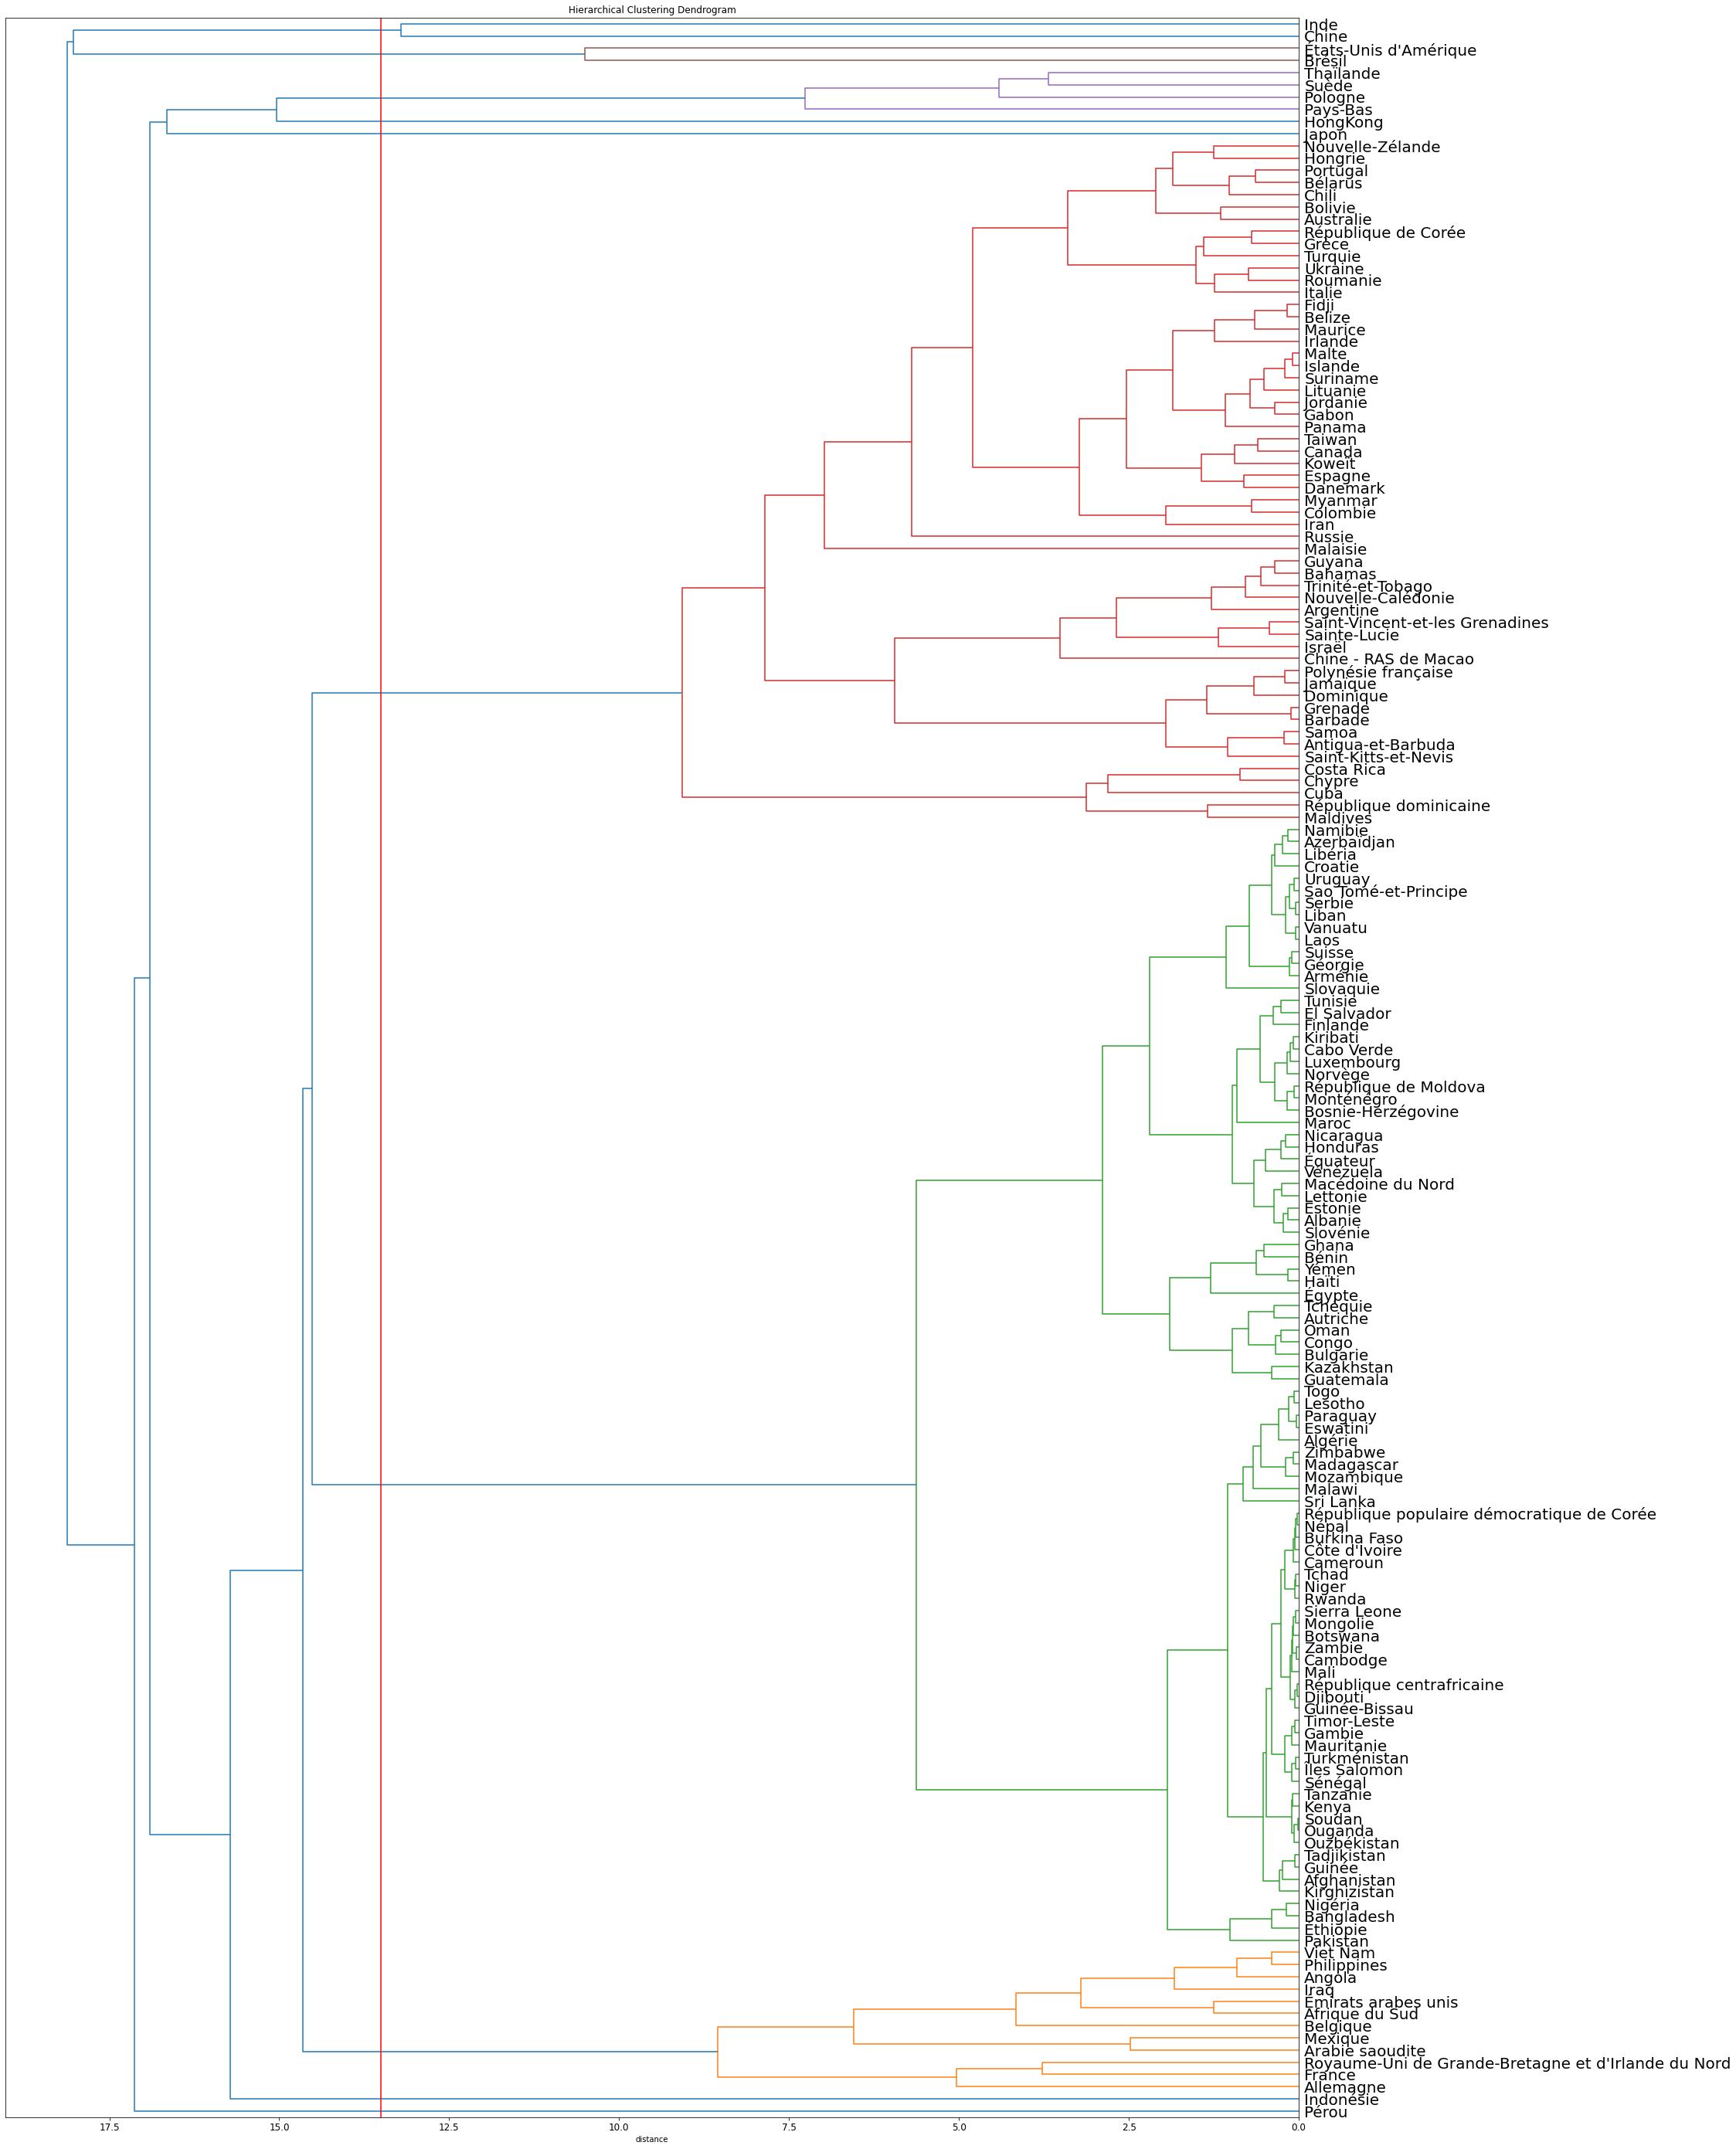

In [47]:
# Affichage du dendrogramme
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(Z, names):
    plt.figure(figsize=(30,50))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    plt.xticks(fontsize=12)
    dendrogram(
        Z,
        labels = names,
        orientation='left',
        leaf_font_size=20,
        
    )
    plt.axvline(x=13.5, color='red')
    plt.show()

plot_dendrogram(Z_synthé, names_synthé)

['Pérou',
 'Indonésie',
 'Allemagne',
 'France',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'Arabie saoudite',
 'Mexique',
 'Belgique',
 'Afrique du Sud',
 'Émirats arabes unis',
 'Iraq',
 'Angola',
 'Philippines',
 'Viet Nam',
 'Pakistan',
 'Éthiopie',
 'Bangladesh',
 'Nigéria',
 'Kirghizistan',
 'Afghanistan',
 'Guinée',
 'Tadjikistan',
 'Ouzbékistan',
 'Ouganda',
 'Soudan',
 'Kenya',
 'Tanzanie',
 'Sénégal',
 'Îles Salomon',
 'Turkménistan',
 'Mauritanie',
 'Gambie',
 'Timor-Leste',
 'Guinée-Bissau',
 'Djibouti',
 'République centrafricaine',
 'Mali',
 'Cambodge',
 'Zambie',
 'Botswana',
 'Mongolie',
 'Sierra Leone',
 'Rwanda',
 'Niger',
 'Tchad',
 'Cameroun',
 "Côte d'Ivoire",
 'Burkina Faso',
 'Népal',
 'République populaire démocratique de Corée',
 'Sri Lanka',
 'Malawi',
 'Mozambique',
 'Madagascar',
 'Zimbabwe',
 'Algérie',
 'Eswatini',
 'Paraguay',
 'Lesotho',
 'Togo',
 'Guatemala',
 'Kazakhstan',
 'Bulgarie',
 'Congo',
 'Oman',
 'Autriche',
 'Tchéquie',
 'Égypte

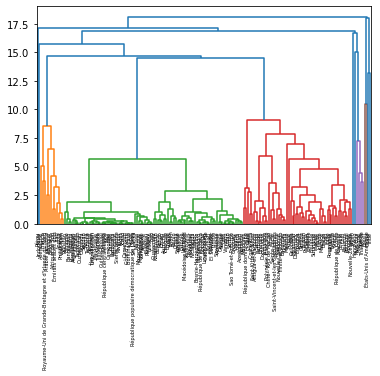

In [48]:
dendrogram(Z_synthé,labels=names_synthé)['ivl']

# Clustering par _K-means_

In [49]:
# Clustering par K-means. On cherche la formule optimale en itérant avec différent nombre de clusters
from sklearn.cluster import KMeans

In [50]:
# On regarde l'inertie pour chaque itération...
i = 2

while i < 21:
    km_i = KMeans(n_clusters=i, n_init=20)
    km_i.fit_transform(X_scaled_synthé)
    clust_i = km_i.inertia_
    print(clust_i)
    i = i +1

1564.0306919024144
1410.4347865298798
1275.7906551019603
1144.903721428379
1025.2566967379955
879.790966265744
752.4842193306974
625.6236983027753
509.5757760096365
413.89324970244877
354.9513909465949
309.45960745036723
274.85049499153763
244.2695627771054
218.9420718295815
192.85220667506525
180.12262845972154
166.40497875555496
145.21764539552234


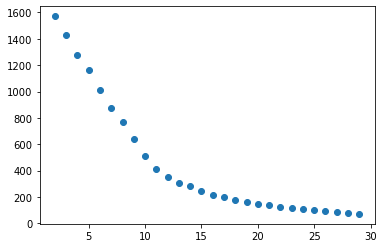

In [51]:
# ... et on les représente graphiquement pour utiliser la technique du "coude"
a=[]
centroid =[]
for i in range(2,30):
    kmeans = KMeans(n_clusters=i, n_init=20, algorithm='full') 
    kmeans.fit(X_scaled_synthé) 
    a.append(kmeans.inertia_)
    centroid.append(kmeans.cluster_centers_)
plt.scatter(range(2,30),a)


## On assigne les clusters aux pays

In [52]:
kmeans = KMeans(n_clusters=10, n_init=20, random_state=42) 
kmeans.fit(X_scaled_synthé) 

KMeans(n_clusters=10, n_init=20, random_state=42)

In [53]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 9, 1, 9, 0, 9, 0, 0, 9, 0, 9, 0, 1, 9, 0, 9, 0,
       0, 8, 0, 0, 0, 0, 0, 9, 9, 4, 0, 5, 0, 9, 0, 0, 9, 0, 0, 1, 0, 0,
       9, 0, 0, 1, 0, 0, 0, 0, 8, 0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0,
       0, 9, 0, 0, 9, 0, 3, 2, 0, 1, 9, 0, 9, 0, 9, 7, 0, 0, 0, 0, 0, 9,
       0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 9, 0, 1, 0, 0, 0, 9, 0,
       0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 0, 1, 6, 0, 9, 9, 0, 0, 0, 0,
       0, 9, 0, 0, 0, 1, 0, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0,
       0, 0, 0, 9, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [54]:
clusters = kmeans.labels_

# Assignation des clusters dans le dataframe
df_synthétique['Cluster'] = clusters
df_synthétique

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie,Cluster
Zone,,,,,,,,,,,
Afghanistan,-1.894115,1.435737,0.157781,-0.269427,-0.157447,0.202911,-0.228709,0.109390,-0.030247,0.023118,0
Afrique du Sud,2.416154,-0.957929,0.204209,0.865675,0.727384,-1.024385,-0.142815,1.628647,0.051914,0.157207,1
Albanie,-0.540497,-0.447577,-0.231222,0.011584,-0.167665,0.005885,-0.173520,-0.019572,-0.144823,0.063285,0
Algérie,-1.442733,1.139082,-0.045115,-0.148678,-0.225200,0.171421,-0.238299,-0.043955,-0.085287,-0.030570,0
Allemagne,2.270924,0.784771,4.759921,-1.077820,0.097375,-1.947814,4.295744,1.163026,0.664297,0.139681,1
...,...,...,...,...,...,...,...,...,...,...,...
Vénézuela,-0.255524,0.028458,-0.326673,0.161074,-0.224205,-0.025683,-0.199065,-0.053321,-0.167131,-0.072762,0
Viet Nam,-0.141148,1.031535,0.332613,0.243073,0.369180,-0.448486,-0.244871,0.948331,0.046291,0.053048,0
Yémen,-1.271327,0.864685,0.107128,-0.122043,-0.076191,0.055967,-0.203424,0.255026,-0.049228,0.021602,0


In [55]:
df_cluster_0 = df_synthétique.loc[df_synthétique['Cluster'] == 0]
df_cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         116 non-null    float64
 1   Production Importante mais Insuffisante     116 non-null    float64
 2   Commerce International                      116 non-null    float64
 3   Perte Importante Sans Risque Alimentaire    116 non-null    float64
 4   Réserve                                     116 non-null    float64
 5   Production Non Alimentaire et Exportatrice  116 non-null    float64
 6   Industrie Domestique                        116 non-null    float64
 7   Production Insuffisante                     116 non-null    float64
 8   Production à Visée Commerciale              116 non-null    float64
 9   Préférence pour le Commerce et l'Industrie  116 non-null    float64
 10  Clus

In [56]:
df_cluster_1 = df_synthétique.loc[df_synthétique['Cluster'] == 1]
df_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Afrique du Sud to Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         11 non-null     float64
 1   Production Importante mais Insuffisante     11 non-null     float64
 2   Commerce International                      11 non-null     float64
 3   Perte Importante Sans Risque Alimentaire    11 non-null     float64
 4   Réserve                                     11 non-null     float64
 5   Production Non Alimentaire et Exportatrice  11 non-null     float64
 6   Industrie Domestique                        11 non-null     float64
 7   Production Insuffisante                     11 non-null     float64
 8   Production à Visée Commerciale              11 non-null     float64
 9   Préférence pour le Commerce et l

In [57]:
df_cluster_2 = df_synthétique.loc[df_synthétique['Cluster'] == 2]
df_cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Indonésie to Indonésie
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster

In [58]:
df_cluster_3 = df_synthétique.loc[df_synthétique['Cluster'] == 3]
df_cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Inde to Inde
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster          

In [59]:
df_cluster_4 = df_synthétique.loc[df_synthétique['Cluster'] == 4]
df_cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, HongKong to HongKong
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster  

In [60]:
df_cluster_5 = df_synthétique.loc[df_synthétique['Cluster'] == 5]
df_cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Chine to Chine
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster        

In [61]:
df_cluster_6 = df_synthétique.loc[df_synthétique['Cluster'] == 6]
df_cluster_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Pérou to Pérou
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster        

In [62]:
df_cluster_7 = df_synthétique.loc[df_synthétique['Cluster'] == 7]
df_cluster_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Japon to Japon
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         1 non-null      float64
 1   Production Importante mais Insuffisante     1 non-null      float64
 2   Commerce International                      1 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    1 non-null      float64
 4   Réserve                                     1 non-null      float64
 5   Production Non Alimentaire et Exportatrice  1 non-null      float64
 6   Industrie Domestique                        1 non-null      float64
 7   Production Insuffisante                     1 non-null      float64
 8   Production à Visée Commerciale              1 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  1 non-null      float64
 10  Cluster        

In [63]:
df_cluster_8 = df_synthétique.loc[df_synthétique['Cluster'] == 8]
df_cluster_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Brésil to États-Unis d'Amérique
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         2 non-null      float64
 1   Production Importante mais Insuffisante     2 non-null      float64
 2   Commerce International                      2 non-null      float64
 3   Perte Importante Sans Risque Alimentaire    2 non-null      float64
 4   Réserve                                     2 non-null      float64
 5   Production Non Alimentaire et Exportatrice  2 non-null      float64
 6   Industrie Domestique                        2 non-null      float64
 7   Production Insuffisante                     2 non-null      float64
 8   Production à Visée Commerciale              2 non-null      float64
 9   Préférence pour le Commerce et l'Industrie  2 non-null      float64
 10

In [64]:
df_cluster_9 = df_synthétique.loc[df_synthétique['Cluster'] == 9]
df_cluster_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Antigua-et-Barbuda to Trinité-et-Tobago
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Production Importante et Suffisante         37 non-null     float64
 1   Production Importante mais Insuffisante     37 non-null     float64
 2   Commerce International                      37 non-null     float64
 3   Perte Importante Sans Risque Alimentaire    37 non-null     float64
 4   Réserve                                     37 non-null     float64
 5   Production Non Alimentaire et Exportatrice  37 non-null     float64
 6   Industrie Domestique                        37 non-null     float64
 7   Production Insuffisante                     37 non-null     float64
 8   Production à Visée Commerciale              37 non-null     float64
 9   Préférence pour le Commerce et l'Industrie  37 non-null     fl

In [65]:
df_cluster = df_synthétique.groupby('Cluster').sum()
df_cluster

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie
Cluster,,,,,,,,,,
0,-110.515407,51.721850,-1.940455,-15.954947,-11.631821,9.843202,-21.380631,3.742923,-14.381869,-0.031106
1,17.907982,-3.331730,18.825490,-0.707050,5.592142,-10.697658,12.685218,16.524771,6.164681,2.951884
2,1.164240,3.418838,2.078958,-1.428053,-0.697065,-2.790902,7.736692,-2.697466,-3.097792,0.219370
3,3.246575,8.261376,-2.307756,7.107201,-1.162954,-3.453001,-0.269687,-2.439440,1.394727,2.228680
4,4.817360,-4.271689,12.789267,4.747431,-2.994603,1.511802,-3.600809,-0.446419,-1.285101,-0.270013
5,12.301318,12.070565,-2.433123,3.756635,-0.109698,-2.673513,-1.926261,0.329015,-0.134385,-1.835739
6,1.154637,1.926454,-1.242362,6.664631,3.254016,8.650387,4.593959,0.795536,0.207009,0.161634
7,2.188117,0.652493,3.361541,-1.747770,11.299251,-1.505584,-2.712119,-1.510447,0.123449,0.326952
8,25.726366,5.923100,-2.016253,-11.016193,-3.266829,6.779354,-1.764268,0.137344,-0.098290,1.958900


In [66]:
for F in df_cluster.columns:
    print('Le cluster typique de la variable ', F, 'est le n°', df_cluster.loc[df_cluster[F] == df_cluster[F].max()].index[0])

Le cluster typique de la variable  Production Importante et Suffisante est le n° 9
Le cluster typique de la variable  Production Importante mais Insuffisante est le n° 0
Le cluster typique de la variable  Commerce International est le n° 1
Le cluster typique de la variable  Perte Importante Sans Risque Alimentaire est le n° 9
Le cluster typique de la variable  Réserve est le n° 7
Le cluster typique de la variable  Production Non Alimentaire et Exportatrice est le n° 0
Le cluster typique de la variable  Industrie Domestique est le n° 1
Le cluster typique de la variable  Production Insuffisante est le n° 1
Le cluster typique de la variable  Production à Visée Commerciale est le n° 9
Le cluster typique de la variable  Préférence pour le Commerce et l'Industrie est le n° 1


In [67]:
for i in df_cluster_9.index:
    print(df_pivot.loc[i])

Population                                                       95426.00
Alimentation pour touristes                                          2.00
Autres utilisations (non alimentaire)                                0.00
Disponibilité alimentaire (Kcal/personne/jour)                     233.00
Disponibilité alimentaire en quantité (kg/personne/an)              54.10
Disponibilité de matière grasse en quantité (g/personne/jour)       17.55
Disponibilité de protéines en quantité (g/personne/jour)            17.77
Disponibilité intérieure                                             7.00
Exportations - Quantité                                              0.00
Importations - Quantité                                              7.00
Nourriture                                                           5.00
Pertes                                                               0.00
Production                                                           0.00
Résidus                               

In [68]:
df_pivot['Importations - Quantité'].sort_values(ascending=False).head(14)

Zone
Japon                                                  1069.0
Mexique                                                 972.0
HongKong                                                907.0
Allemagne                                               842.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord     779.0
Arabie saoudite                                         722.0
Pays-Bas                                                608.0
Afrique du Sud                                          514.0
France                                                  506.0
Iraq                                                    470.0
Chine                                                   452.0
Émirats arabes unis                                     433.0
Belgique                                                338.0
Cuba                                                    312.0
Name: Importations - Quantité, dtype: float64

TOUS LES PAYS DU CLUSTER 1 FONT PARTIE DES 14 PAYS QUI IMPORTE LE PLUS AU MONDE.

In [69]:
df_cluster_7.shape

(1, 11)

In [70]:
df_cluster_7

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie,Cluster
Zone,,,,,,,,,,,
Japon,2.188117,0.652493,3.361541,-1.74777,11.299251,-1.505584,-2.712119,-1.510447,0.123449,0.326952,7


,pays,couleur
0,Pérou,C0
1,Indonésie,C0
2,Allemagne,C1
3,France,C1
4,Royaume-Uni de Grande-Bretagne et d'Irlande du...,C1
...,...,...
167,Thaïlande,C4
168,Brésil,C5
169,États-Unis d'Amérique,C5
170,Chine,C0


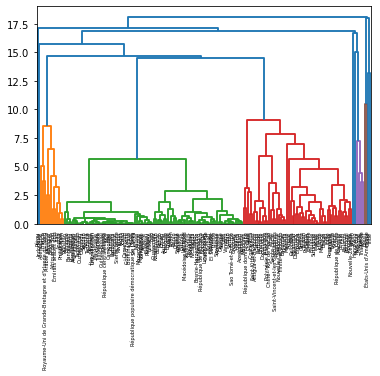

In [71]:
d={'pays':dendrogram(Z_synthé,labels=names_synthé)['ivl'], 'couleur':dendrogram(Z_synthé,labels=names_synthé)['leaves_color_list']}
df_couleur = pd.DataFrame(data=d)
df_couleur

In [72]:
df_couleur_vert=df_couleur.loc[df_couleur['couleur']=='C2']
df_couleur_vert.shape

(92, 2)

In [73]:
df_couleur_rouge=df_couleur.loc[df_couleur['couleur']=='C3']
df_couleur_rouge.shape

(56, 2)

In [74]:
df_couleur_orange=df_couleur.loc[df_couleur['couleur']=='C1']
df_couleur_orange.shape

(12, 2)

In [75]:
df_couleur_violet=df_couleur.loc[df_couleur['couleur']=='C4']
df_couleur_violet.shape

(4, 2)

In [76]:
df_cluster_1.shape

(11, 11)

In [77]:
commun=[]
for i in df_cluster_0.index:
    for j in df_couleur_vert['pays']:
        if i==j:
            commun.append(j)
print(len(commun))


92


In [78]:
commun=[]
for i in df_cluster_0.index:
    for j in df_couleur_rouge['pays']:
        if i==j:
            commun.append(j)
print(len(commun))


21


In [79]:
commun=[]
for i in df_cluster_1.index:
    for j in df_couleur_rouge['pays']:
        if i==j:
            commun.append(j)
print(commun)


['Cuba']


In [80]:
commun=[]
for i in df_cluster_9.index:
    for j in df_couleur_violet['pays']:
        if i==j:
            commun.append(j)
print(commun)


['Pologne', 'Suède', 'Thaïlande']


# Pojection des clusters sur les axes

In [81]:
df_cluster

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie
Cluster,,,,,,,,,,
0,-110.515407,51.721850,-1.940455,-15.954947,-11.631821,9.843202,-21.380631,3.742923,-14.381869,-0.031106
1,17.907982,-3.331730,18.825490,-0.707050,5.592142,-10.697658,12.685218,16.524771,6.164681,2.951884
2,1.164240,3.418838,2.078958,-1.428053,-0.697065,-2.790902,7.736692,-2.697466,-3.097792,0.219370
3,3.246575,8.261376,-2.307756,7.107201,-1.162954,-3.453001,-0.269687,-2.439440,1.394727,2.228680
4,4.817360,-4.271689,12.789267,4.747431,-2.994603,1.511802,-3.600809,-0.446419,-1.285101,-0.270013
5,12.301318,12.070565,-2.433123,3.756635,-0.109698,-2.673513,-1.926261,0.329015,-0.134385,-1.835739
6,1.154637,1.926454,-1.242362,6.664631,3.254016,8.650387,4.593959,0.795536,0.207009,0.161634
7,2.188117,0.652493,3.361541,-1.747770,11.299251,-1.505584,-2.712119,-1.510447,0.123449,0.326952
8,25.726366,5.923100,-2.016253,-11.016193,-3.266829,6.779354,-1.764268,0.137344,-0.098290,1.958900


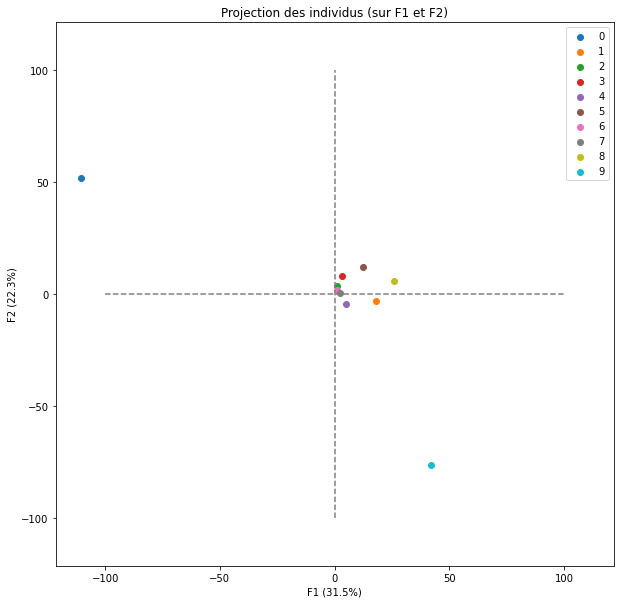

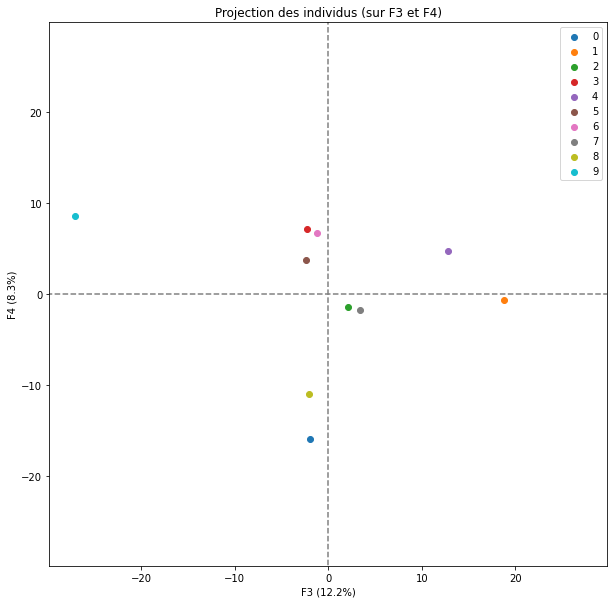

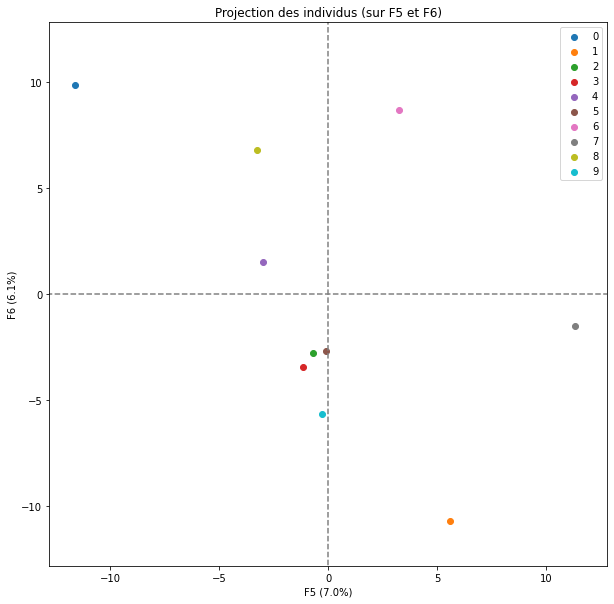

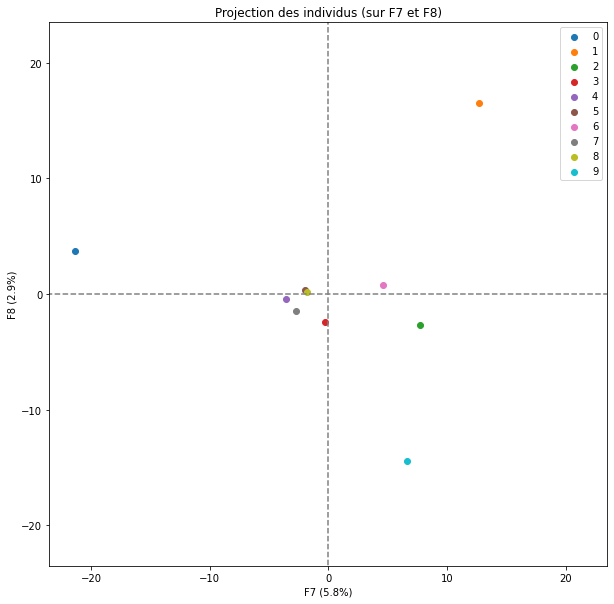

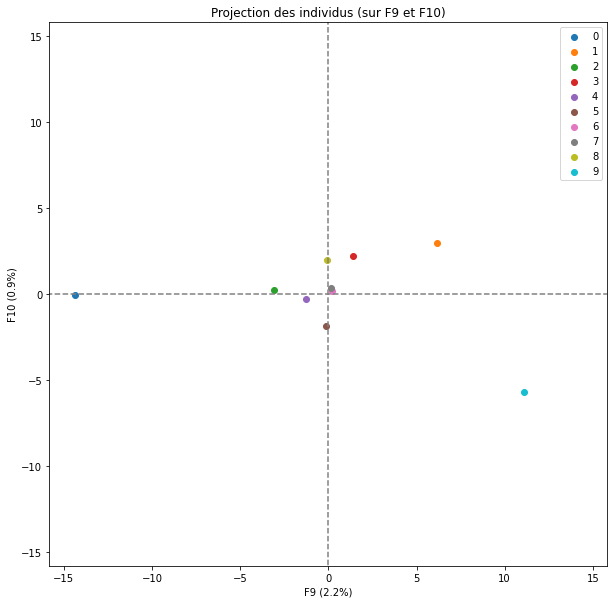

In [82]:
display_factorial_planes(df_cluster.values, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], illustrative_var = df_cluster.index)

<AxesSubplot:xlabel='Cluster'>

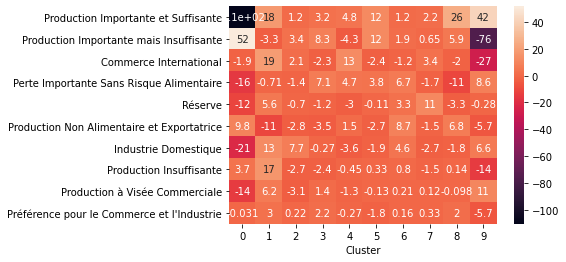

In [83]:
# une heatmap avec les croisements entre les clusters de pays et les différentes variables
import seaborn as sns
sns.heatmap(np.transpose(df_cluster), annot=True)

<AxesSubplot:ylabel='Cluster'>

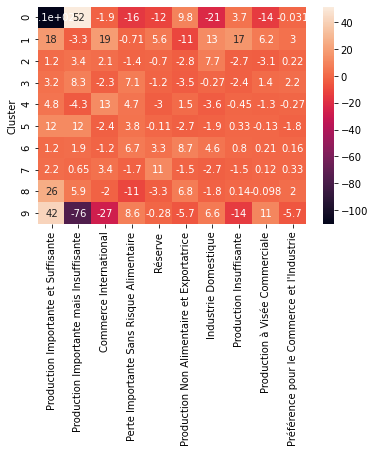

In [84]:
sns.heatmap(df_cluster, annot=True)

In [85]:
df_cluster_individuels=pd.concat([df_cluster_2,df_cluster_3,df_cluster_4,df_cluster_5,df_cluster_6,df_cluster_7, df_cluster_8])
df_cluster_individuels

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie,Cluster
Zone,,,,,,,,,,,
Indonésie,1.164240,3.418838,2.078958,-1.428053,-0.697065,-2.790902,7.736692,-2.697466,-3.097792,0.219370,2
Inde,3.246575,8.261376,-2.307756,7.107201,-1.162954,-3.453001,-0.269687,-2.439440,1.394727,2.228680,3
HongKong,4.817360,-4.271689,12.789267,4.747431,-2.994603,1.511802,-3.600809,-0.446419,-1.285101,-0.270013,4
Chine,12.301318,12.070565,-2.433123,3.756635,-0.109698,-2.673513,-1.926261,0.329015,-0.134385,-1.835739,5
Pérou,1.154637,1.926454,-1.242362,6.664631,3.254016,8.650387,4.593959,0.795536,0.207009,0.161634,6
Japon,2.188117,0.652493,3.361541,-1.747770,11.299251,-1.505584,-2.712119,-1.510447,0.123449,0.326952,7
Brésil,10.493553,1.690928,-1.028559,-5.042207,-2.352033,3.254863,-1.666404,-0.084355,1.082031,2.699463,8
États-Unis d'Amérique,15.232814,4.232172,-0.987694,-5.973986,-0.914796,3.524491,-0.097864,0.221700,-1.180321,-0.740563,8


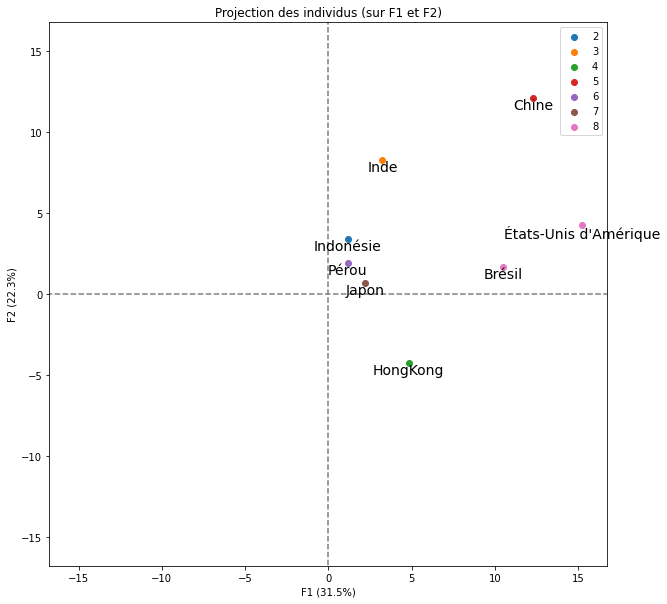

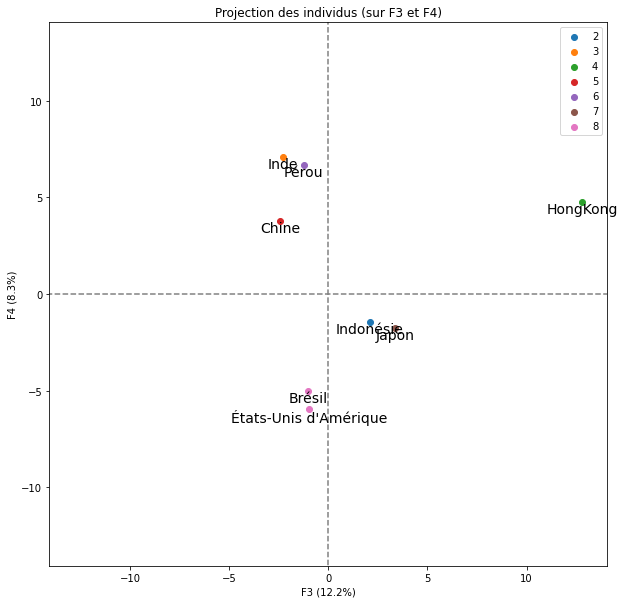

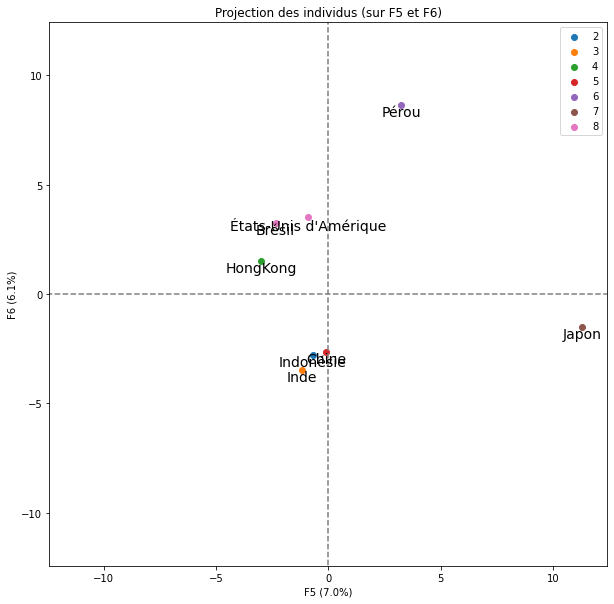

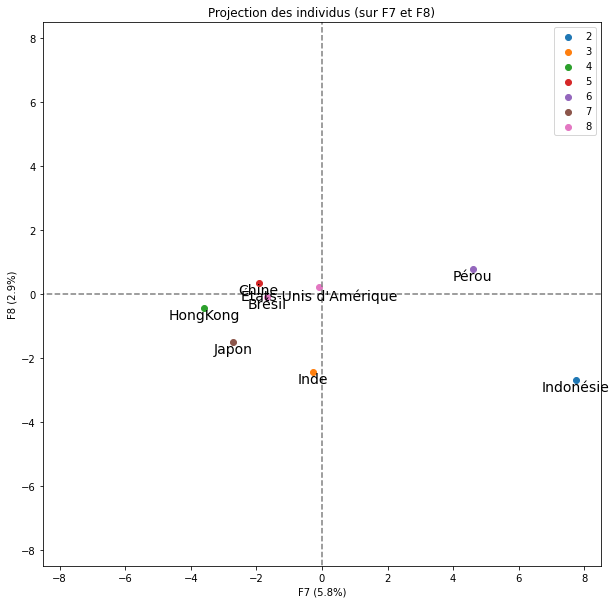

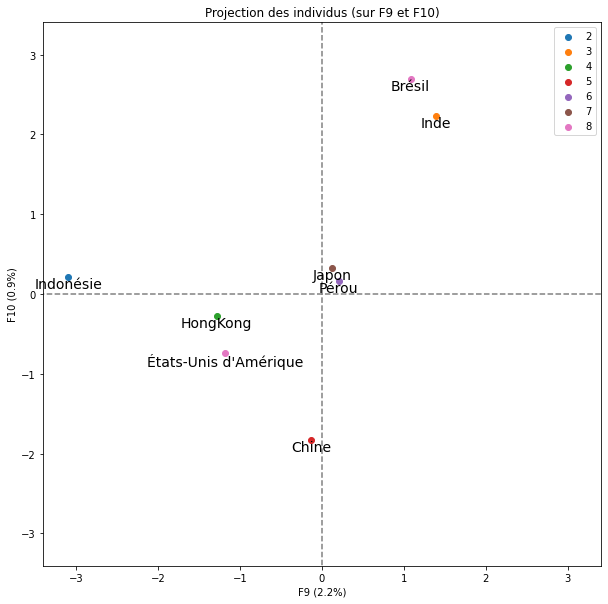

In [86]:
display_factorial_planes(df_cluster_individuels.values, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels=df_cluster_individuels.index, illustrative_var=df_cluster_individuels['Cluster'])

In [87]:
df_cluster_0.shape

(116, 11)

## Étude des centroïdes

In [88]:
kmeans.cluster_centers_

array([[-4.24360167e-01,  2.35833523e-01, -1.19507391e-02,
        -1.19298250e-01, -9.44141645e-02,  8.58342774e-02,
        -1.91464431e-01,  4.76028033e-02, -2.06714150e-01,
        -7.16158641e-04],
       [ 7.25143148e-01, -1.60201519e-01,  1.22265170e+00,
        -5.57512087e-02,  4.78666396e-01, -9.83735518e-01,
         1.19792829e+00,  2.21626876e+00,  9.34395634e-01,
         7.16677603e-01],
       [ 5.18575839e-01,  1.80828954e+00,  1.48523413e+00,
        -1.23862861e+00, -6.56327763e-01, -2.82310389e+00,
         8.03675829e+00, -3.97956595e+00, -5.16493798e+00,
         5.85859614e-01],
       [ 1.44608968e+00,  4.36960171e+00, -1.64869021e+00,
         6.16446349e+00, -1.09498916e+00, -3.49284275e+00,
        -2.80146914e-01, -3.59889997e+00,  2.32542348e+00,
         5.95202687e+00],
       [ 2.14574886e+00, -2.25937890e+00,  9.13681483e+00,
         4.11770567e+00, -2.81959523e+00,  1.52924538e+00,
        -3.74046508e+00, -6.58600462e-01, -2.14264537e+00,
        -7.

In [89]:
del df_synthétique['Cluster']

In [90]:
df_centroid = pd.DataFrame(data=kmeans.cluster_centers_, index=np.unique(kmeans.labels_), columns=df_synthétique.columns)
df_centroid

,Production Importante et Suffisante,Production Importante mais Insuffisante,Commerce International,Perte Importante Sans Risque Alimentaire,Réserve,Production Non Alimentaire et Exportatrice,Industrie Domestique,Production Insuffisante,Production à Visée Commerciale,Préférence pour le Commerce et l'Industrie
0,-0.424360,0.235834,-0.011951,-0.119298,-0.094414,0.085834,-0.191464,0.047603,-0.206714,-0.000716
1,0.725143,-0.160202,1.222652,-0.055751,0.478666,-0.983736,1.197928,2.216269,0.934396,0.716678
2,0.518576,1.808290,1.485234,-1.238629,-0.656328,-2.823104,8.036758,-3.979566,-5.164938,0.585860
3,1.446090,4.369602,-1.648690,6.164463,-1.094989,-3.492843,-0.280147,-3.598900,2.325423,5.952027
4,2.145749,-2.259379,9.136815,4.117706,-2.819595,1.529245,-3.740465,-0.658600,-2.142645,-0.721111
5,5.479254,6.384356,-1.738254,3.258335,-0.103287,-2.704361,-2.000970,0.485394,-0.224059,-4.902619
6,0.514299,1.018939,-0.887559,5.780598,3.063848,8.750198,4.772135,1.173652,0.345146,0.431668
7,0.974631,0.345116,2.401527,-1.515936,10.638909,-1.522956,-2.817308,-2.228360,0.205827,0.873176
8,5.729520,1.566421,-0.720218,-4.777473,-1.537956,3.428788,-0.916348,0.101312,-0.081939,2.615769
9,0.505718,-1.091736,-0.523555,0.201088,-0.007187,-0.154850,0.186361,-0.575598,0.500530,-0.412187


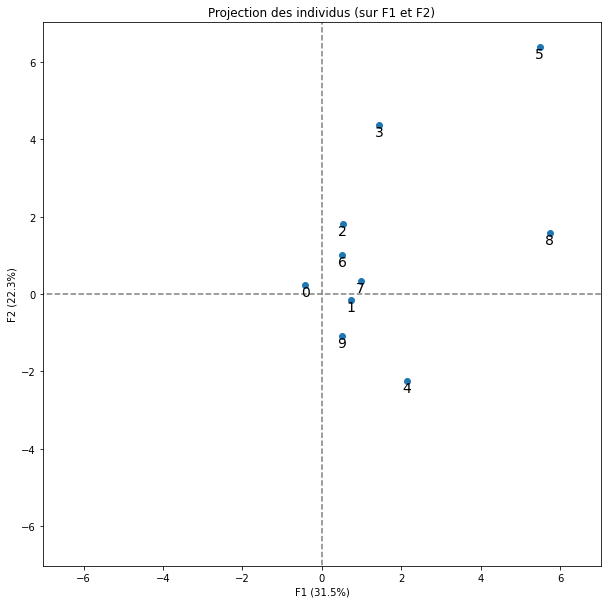

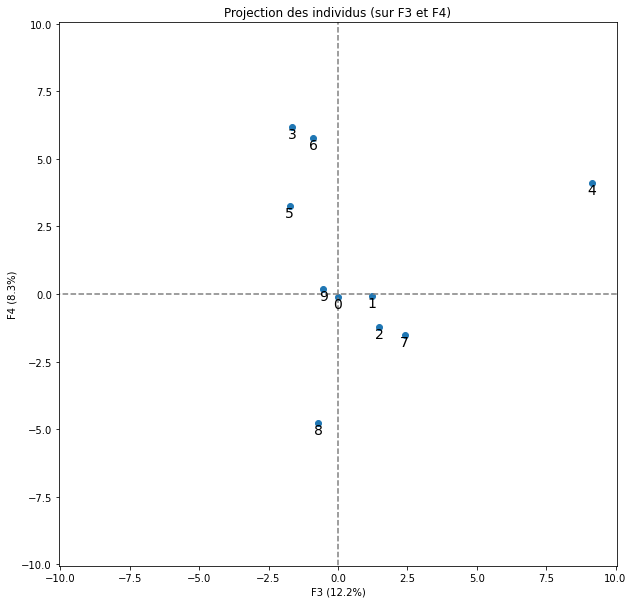

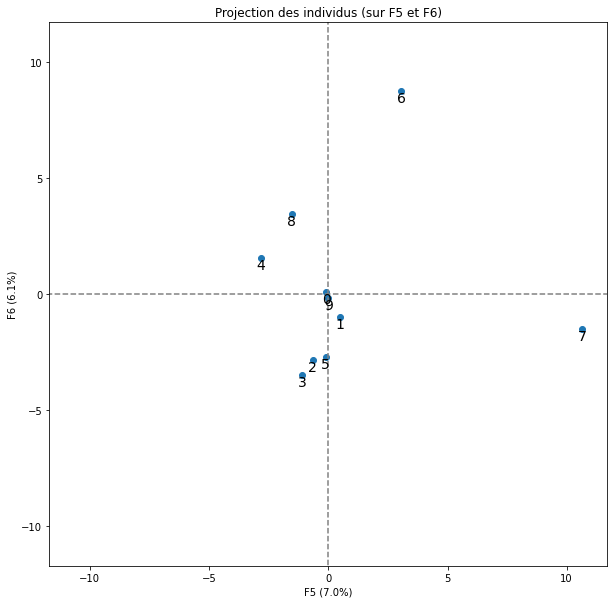

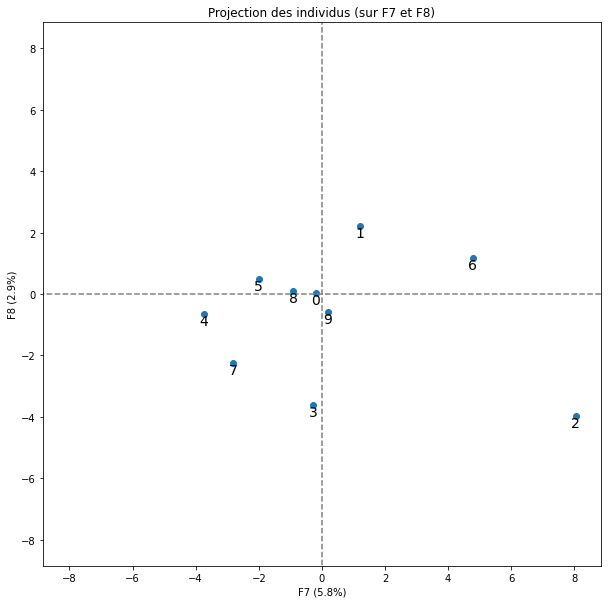

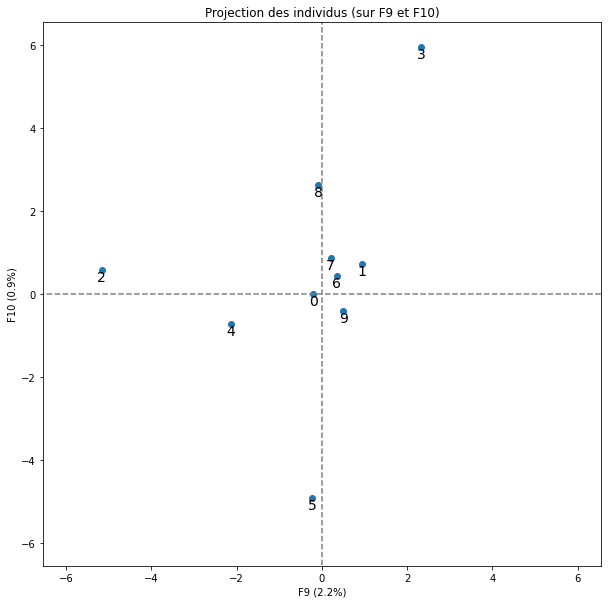

In [91]:
display_factorial_planes(df_centroid.values, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels = df_centroid.index)